In [1]:
from warnings import filterwarnings
filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans
 

Read the data

In [3]:
df = pd.read_csv("USArrests.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
# Making unnamed asa index
df.index = df.iloc[:,0]

In [5]:
df = df.iloc[:,1:5]

In [8]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf39f96b00>,
      dtype=object)

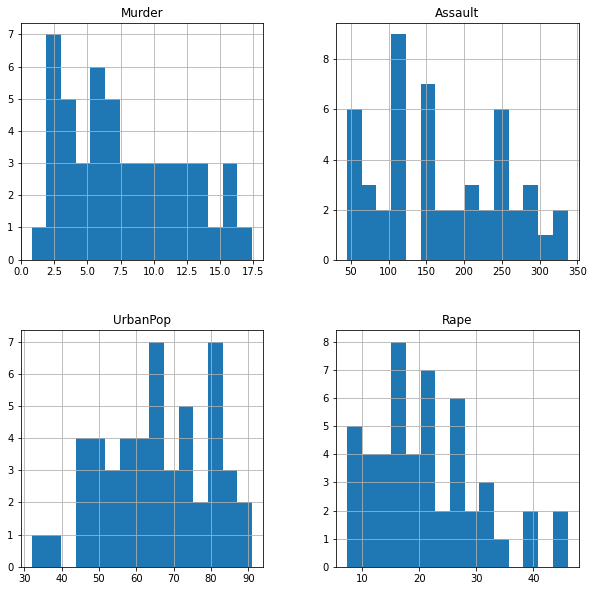

In [11]:
df.hist(bins=15,figsize=(10,10))

Create the model

In [12]:
kmeans = KMeans(n_clusters = 4)
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [14]:
k_fit = kmeans.fit(df)
k_fit

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
k_fit.n_clusters


4

In [16]:
k_fit.cluster_centers_

array([[  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ]])

In [17]:
k_fit.labels_

array([2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 0, 2,
       3, 2, 0, 1, 1, 2, 3, 0, 2, 2, 2, 3, 1, 0, 0, 1, 0, 2, 3, 0, 0, 1,
       3, 0, 0, 3, 3, 0], dtype=int32)

Visualization

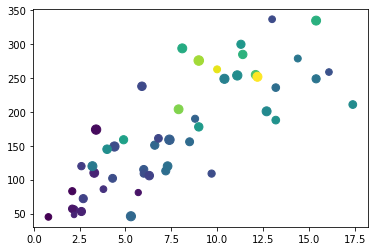

In [18]:
clusters = k_fit.labels_
plt.scatter(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], df.iloc[:,3])

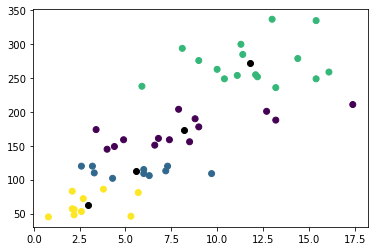

In [20]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters)
centers = k_fit.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c = 'black')

Clusters and observations

In [21]:
pd.DataFrame({"Urbans": df.index, "Clusters": clusters})[:10]

,Urbans,Clusters
0,Alabama,2
1,Alaska,2
2,Arizona,2
3,Arkansas,0
4,California,2
5,Colorado,0
6,Connecticut,1
7,Delaware,2
8,Florida,2
9,Georgia,0


In [22]:
df['Clusters'] = clusters
df.head()

,Murder,Assault,UrbanPop,Rape,Clusters
Unnamed: 0,,,,,
Alabama,13.2,236,58,21.2,2
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,2


In [23]:
df.Clusters.unique()

array([2, 0, 1, 3], dtype=int32)

Optimization-Model Tunning

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf392a7fd0>,
                 k=None, metric=None, model=None, timings=True)

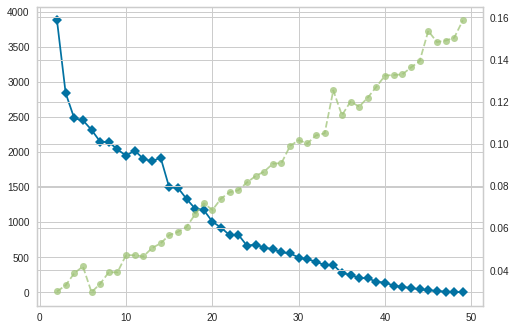

In [26]:
from yellowbrick.cluster import KElbowVisualizer
#kmeans = kMeans()
visualizer = KElbowVisualizer(kmeans, k = (2,50))
visualizer.fit(df)
#visualizer.proof()